In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras.models
import matplotlib.pyplot as plt
import numpy as np

In [5]:

folder = "D:/FCI/CV/سكاشن/Dataset"

train_dir = folder + '/train' 
test_dir =  folder + '/test'

input_shape = (128, 128, 3) 


batch_size = 16
epochs = 15

In [6]:

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

Found 3208 images belonging to 2 classes.
Found 708 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=epochs)


test_loss, test_accuracy = model.evaluate(test_generator)

print("Loss:", test_loss)
print("Accuracy:", test_accuracy)



C:\Users\elnour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\elnour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 160s 770ms/step - accuracy: 0.7816 - loss: 0.4616
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.9375 - loss: 0.1096  
Epoch 3/15


C:\Users\elnour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 97s 486ms/step - accuracy: 0.9207 - loss: 0.2126
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 1.0000 - loss: 0.0519  
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 96s 481ms/step - accuracy: 0.9449 - loss: 0.1584
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - accuracy: 1.0000 - loss: 0.0310  
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 99s 493ms/step - accuracy: 0.9528 - loss: 0.1366
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 141us/step - accuracy: 1.0000 - loss: 0.0287  
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 99s 497ms/step - accuracy: 0.9545 - loss: 0.1260
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 181us/step - accuracy: 0.9375 - loss: 0.0874  
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 107s 535ms/step - accuracy: 0.9769 - loss: 0.0699
Epoch 12/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 1.0000 - loss: 0.0364  
Epoch 13/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 561ms/step - accuracy: 0.9843 - loss: 0.0573
Epoch 14/15
200/200 ━

In [9]:
model.save('keras_model.h5')

In [10]:

model = keras.models.load_model('keras_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


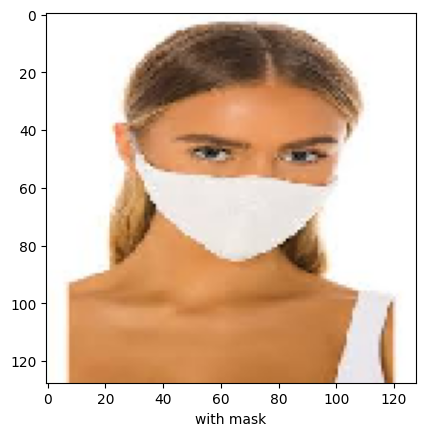

In [13]:
random_image, random_label = next(test_generator)


data_resized = tf.image.resize(random_image[0], [128, 128]) 
data_resized = tf.expand_dims(data_resized, axis=0)

predictions = model.predict(data_resized)
predicted_label = np.argmax(predictions)



prediction_name = ""

if(predicted_label==0):
    prediction_name = "with mask"
else:
    prediction_name = "no mask"
    
   

plt.imshow(random_image[0]) 
plt.xlabel(prediction_name)
plt.show()
